# Spam Detection with Machine Learning

<img src='max.jpg' width=800>

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')

In [5]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
import seaborn as sns

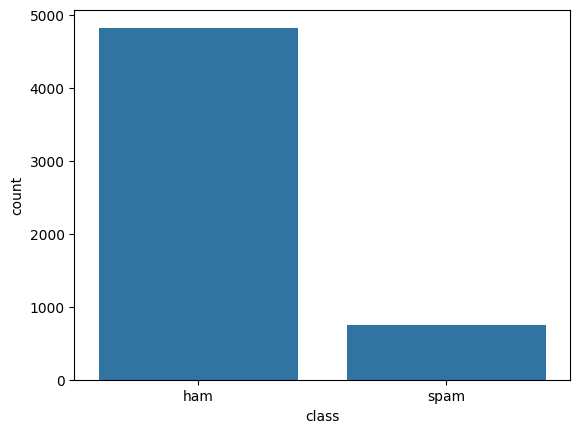

In [7]:
sns.countplot(x=df['class']);

In [8]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [10]:
df.columns=['class','text']

In [11]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
import neattext as nfx

In [13]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['text']=df['text'].apply(nfx.normalize)

In [15]:
df.head()

,class,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5572, 2)

In [17]:
s=''.join(df['text']) # text sütunundaki bütün yazilanlari bir araya toplayalim

In [18]:
s # yazinin icerisindeki yabanci karakterler oldugunu görüyoruz. Bunun icin bazi temizlik islermleri yapmaliyiz.
# bu temizlik islemlerinide yine nfx ile yapabiliyoruz.

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...ok lar... joking wif u oni...free entry in  a wkly comp to win fa cup final tkts  may . text fa to  to receive entry question(std txt rate)t&c\'s apply \'su dun say so early hor... u c already then say...nah i don\'t think he goes to usf, he lives around here thoughfreemsg hey there darling it\'s been  week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£. to rcveven my brother is not like to speak with me. they treat me like aids patent.as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press * to copy your friends callertunewinner!! as a valued network customer you have been selected to receivea å£ prize reward! to claim call . claim code . valid  hours only.had your mobile  months or more? u r entitled to update to the latest colour mobiles with camera for

In [19]:
s=nfx.clean_text(s)

In [20]:
s

'jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...ok lar... joking wif u oni...free entry wkly comp win fa cup final tkts . text fa receive entry question(std txt rate)t&c\'s apply \'su dun early hor... u c say...nah think goes usf, lives thoughfreemsg hey darling week\'s word back! i\'d like fun still? tb ok! xxx std chgs send, å£. rcveven brother like speak me. treat like aids patent.as request \'melle melle (oru minnaminunginte nurungu vettam)\' set callertune callers. press * copy friends callertunewinner!! valued network customer selected receivea å£ prize reward! claim . claim code . valid hours only.had mobile months more? u r entitled update latest colour mobiles camera free! mobile update co free i\'m gonna home soon want talk stuff anymore tonight, k? i\'ve cried today.six chances win cash! , pounds txt> send . cost /day, , + tsandcs apply reply hl infourgent! week free membership å£, prize jackpot! txt word: claim no: t&c www.dbuk.net l

In [21]:
s=nfx.remove_emails(s) # yazi icindeki emallleri kaldirmak icin 

In [22]:
s=nfx.remove_special_characters(s) # yazi icindeki özel /, (+),i\m'... gibi karakterleri temizlemek icin.

In [23]:
s

'jurong point crazy available bugis n great world la e buffet cine got amore watok lar joking wif u onifree entry wkly comp win fa cup final tkts  text fa receive entry questionstd txt ratetcs apply su dun early hor u c saynah think goes usf lives thoughfreemsg hey darling weeks word back id like fun still tb ok xxx std chgs send  rcveven brother like speak me treat like aids patentas request melle melle oru minnaminunginte nurungu vettam set callertune callers press  copy friends callertunewinner valued network customer selected receivea  prize reward claim  claim code  valid hours onlyhad mobile months more u r entitled update latest colour mobiles camera free mobile update co free im gonna home soon want talk stuff anymore tonight k ive cried todaysix chances win cash  pounds txt send  cost day   tsandcs apply reply hl infourgent week free membership  prize jackpot txt word claim no tc wwwdbuknet lccltd pobox ive searching right words thank breather promise wont help granted fulfil 

In [27]:
s=nfx.TextFrame(s) # Burada da textframa yapiyoruz

In [29]:
s.describe()

Key      Value          
Length  : 268764         
vowels  : 81091          
consonants: 142780         
stopwords: 1865           
punctuations: 0              
special_char: 0              
tokens(whitespace): 42814          
tokens(words): 42814          


In [33]:
df.shape

(5572, 2)

In [35]:
s.length

268764

In [37]:
s.head(50)

'jurong point crazy available bugis n great world l'

In [39]:
s.tail(50)

' like id interested buying week gave freerofl true'

In [41]:
s.readability()

{'automated readability': 22453.767051721832, 'description': None}

In [47]:
x = np.array(df["text"])
y = np.array(df["class"])
cv = CountVectorizer()
x = cv.fit_transform(x) # Fit the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [49]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message: You won $40 cash price


['spam']
